<br/>

$$ \huge{\underline{\textbf{ UCB Bandit }}} $$

<br/>

<center>Implementation of <b>UCB Bandit</b></center>
<center>from Sutton and Barto 2018, <b>chapter 2.7</b>.</center>
<center>Book available for free <a href="http://incompleteideas.net/book/the-book-2nd.html">here</a></center>

<br/>

UCB Bandit is the same as [Simple Bandit](0204_Simple_Bandit.html) but with different $A$ selection rule. See book equation (2.10). UCB is used e.g. in AlphaZero algorithm.

$$ A_t \doteq \mathop{\text{argmax}}_a \big[ Q_t(a) + c \sqrt{\frac{\ln{t}}{N_t(a)}} \big] $$

<br/>

In [ ]:
def ucb_bandit(env, nb, c):
    t = 0  # step
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    # select each action at lest once
    for A in range(env.size):
        R = env.step(A)
        N[A] += 1
        Q[A] += (1/N[A]) * (R - Q[A])
        t += 1
        
        hist_R.append(R)
    
    # then use UCB
    for _ in range(t, nb):
        A = argmax_rand( Q + c * np.sqrt( np.log(t) / N ) )
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        t += 1
        
        hist_R.append(R)
        
    return Q, np.array(hist_R)

Helper functions:

In [2]:
def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == arr.max()))

---

<table>
    <tr>
        <td style="border-color: white;"><img src="assets/fig_0203.png"/></td>
    </tr>
    <tr>
        <td style="border-color: white;"><center>Figure 2.3<center/></td>
    </tr>
</table>

# Experiment Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Environment

In [4]:
class BanditEnv:
    def __init__(self):
        """10-armed testbed, see chapter 2.3"""
        self.size = 10                                        # 10 arms
        self.means = np.array([0.25, -0.75, 1.5, 0.5, 1.25,   # eyeball fig 2.1
                               -1.5, -0.25, -1, 0.75, -0.5])
    def step(self, action):
        return np.random.normal(loc=self.means[action])

Add history logging

In [5]:
def ucb_bandit(env, nb, c):
    
    hist_R = []
    
    t = 0  # step
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    # select each action at lest once
    for A in range(env.size):
        R = env.step(A)
        N[A] += 1
        Q[A] += (1/N[A]) * (R - Q[A])
        t += 1
        
        hist_R.append(R)
    
    for _ in range(t, nb):
        A = argmax_rand( Q + c * np.sqrt( np.log(t) / N ) )
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        t += 1
        
        hist_R.append(R)
        
    return Q, np.array(hist_R)

In [8]:
def simple_bandit(env, nb, eps):
    hist_R = []
    
    Q = np.zeros(env.size)
    N = np.zeros(env.size)
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        N[A] += 1                
        Q[A] += (1/N[A]) * (R - Q[A])
        
        hist_R.append(R)
        
    return Q, np.array(hist_R)

In [21]:
env = BanditEnv()

runs_ep01_R = []
runs_ucb1_R = []

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    _, hist_R = simple_bandit(env, nb=1000, eps=0.1)
    runs_ep01_R.append(hist_R)
    
    _, hist_R = ucb_bandit(env, nb=1000, c=2.0)
    runs_ucb1_R.append(hist_R)
    
    if i % 100 == 0: print('.', end='')

runs_ep01_R = np.array(runs_ep01_R)
runs_ucb1_R = np.array(runs_ucb1_R)

Calculate average reward

In [22]:
# Calc average reward
avg_ep01_R = np.average(runs_ep01_R, axis=0)
avg_ucb1_R = np.average(runs_ucb1_R, axis=0)

Plot the plots

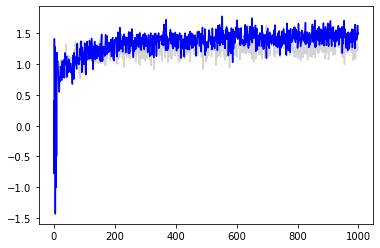

In [24]:
plt.plot(avg_ep01_R, color='lightgray', label='e-greedy 0.1')
plt.plot(avg_ucb1_R, color='blue', label='UCB c=2')

In [98]:
N

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [99]:
Q

array([ 0.25, -0.75,  1.5 ,  0.5 ,  1.25, -1.5 , -0.25, -1.  ,  0.75,
       -0.5 ])

In [100]:
t

10

In [101]:
np.log(t)

2.302585092994046

In [109]:
A = argmax_rand( Q + c * np.sqrt( np.log(t) / N ) )

In [78]:
vals = Q + c * np.sqrt( np.log(t) / (N) )
vals

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [79]:
A = np.argmax(vals)
A

0

In [80]:
R = env.step(A)
R

0.25

In [81]:
N[A] += 1
N

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
Q[A] += (1/N[A]) * (R - Q[A])

In [51]:
t = np.array([2., 3., 4., 5., 6., 7., 8., 9.])
n = np.array([1., 1., 2., 2., 3., 3., 4., 4.])

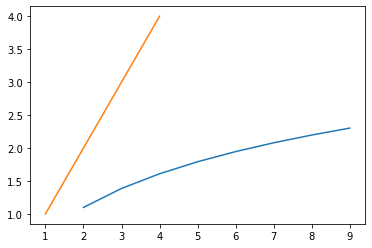

In [52]:
plt.plot( t, np.log(t+1) )
plt.plot( n, n )

In [ ]:
q = 

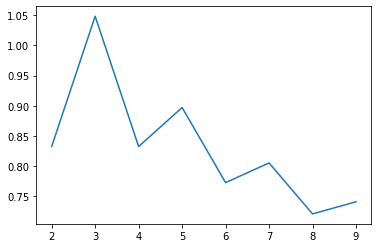

In [58]:
plt.plot( t, c*np.sqrt( np.log(t)/n ) )

In [50]:
np.sqrt( np.log(t+1)/(n+1e-6) )

array([0.00000000e+00, 8.32554611e+02, 1.04814655e+00, 1.17740943e+00,
       8.97061065e-01, 9.46509000e-01, 8.05379724e-01, 8.32554472e-01,
       7.41151811e-01, 7.58713470e-01])

Add history logging

In [5]:
def tracking_bandit(env, nb, eps, alpha, Q_init):
    hist_A = []
    hist_R = []
    
    Q = np.zeros(env.size) + Q_init
    
    for _ in range(nb):
        A = argmax_rand(Q) if np.random.rand() > eps else np.random.randint(env.size)            
        R = env.step(A)    
        Q[A] += alpha * (R - Q[A])
        
        hist_A.append(A)
        hist_R.append(R)
        
    return Q, np.array(hist_A), np.array(hist_R)

# Recreate Figure 2.3

In [6]:
env = BanditEnv()

runs_opt_gr_A = []      #  optimistic, greedy
runs_real_eps01 = []    #  realistic, eps=0.1

print('v' + ' '*18 + 'v')  # poor man tqdm
for i in range(2000):
    _, hist_A, _ = tracking_bandit(env, nb=1000, eps=0, alpha=0.1, Q_init=5)
    _, runs_opt_gr_A.append(hist_A)
    
    _, hist_A, _ = tracking_bandit(env, nb=1000, eps=0.1, alpha=0.1, Q_init=0)
    _, runs_real_eps01.append(hist_A)
    
    if i % 100 == 0: print('.', end='')
    
runs_opt_gr_A = np.array(runs_opt_gr_A)
runs_real_eps01 = np.array(runs_real_eps01)

v                  v
....................

In [7]:
# Calc "% optimal action"
max_A = np.argmax(env.means)
opt_opt_gr_A = np.average(runs_opt_gr_A==max_A, axis=0)
opt_real_ep01_A = np.average(runs_real_eps01==max_A, axis=0)

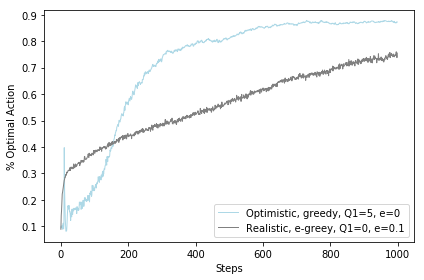

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(opt_opt_gr_A,    linewidth=1., color='lightblue', label='Optimistic, greedy, Q1=5, e=0')
ax.plot(opt_real_ep01_A, linewidth=1., color='gray',      label='Realistic, e-greey, Q1=0, e=0.1')
ax.set_xlabel('Steps'); ax.set_ylabel('% Optimal Action')
ax.legend()
plt.tight_layout()
plt.savefig('assets/fig_0203.png')
plt.show()